<a href="https://colab.research.google.com/github/tohsin/Deeplearning/blob/master/Cross_validation_implimenation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [ ]:
import numpy as np
from numpy import genfromtxt

my_data=genfromtxt('/content/drive/My Drive/Colab Notebooks/data_file.csv',delimiter=',')

new_array=np.delete(my_data ,0,0 )

#a place to store the label or target value
label=[]


for element in new_array:
    label.append(element[-1])

data=np.delete(new_array,8,axis=1)
tensor_label=np.asarray(label)

#sharing the data 90 to 10 percent 
train_data=data[:615]
train_targets=tensor_label[:615]

test_data=data[615:]
test_targets=tensor_label[:615]


In [ ]:
#using manual method to try to normalise the data and put the values between 0 and 1
mean=train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /=std

test_data -=mean
test_data/= std

In [ ]:
from tensorflow.keras import models, layers

#funtion to build model
def build_model():
    model=models.Sequential()
    model.add(layers.Dense(216, activation='relu', input_shape=(train_data.shape[1],)))
    #adding noise with not a lot of dropout to reduce overfitting
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512 ,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['acc'])
    #used optimizer  funtion of rmsprop ,loss of binary cross entropy
    #since to just compare two values a or b and metric of accuracy as means of measurement
    return model

In [ ]:
#decided to use k fold validation as the data isnt large enough for regular 
#data classification
k=4
num_val_samples=len(train_data) // k
num_of_epochs=100
accuracy_val=[]
for i in range (k):
  word="running process {}/{} :"
  print(word.format((i+1),k))

  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples] 
  val_target=train_targets[i * num_val_samples: (i + 1) * num_val_samples]

  #remianing data
  partial_train_data=np.concatenate(
      [train_data[:i*num_val_samples],
      train_data[(i+1) *num_val_samples:]],
      axis=0)
 
  partial_train_targets=np.concatenate(
      [train_targets[:i*num_val_samples],
      train_targets[(i+1) *num_val_samples:]],
      axis=0)
  model=build_model()
  history=model.fit(partial_train_data, partial_train_targets, 
                      validation_data=(val_data,val_target),   
              epochs=num_of_epochs, batch_size=1)
  accuracy=history.history['acc']
  accuracy_val.append(accuracy)

running process 1/4 :
Epoch 1/100
462/462 [==============================] - 1s 3ms/step - loss: 4.6883 - acc: 0.5844 - val_loss: 2.9197 - val_acc: 0.6471
Epoch 2/100
462/462 [==============================] - 1s 3ms/step - loss: 1.8631 - acc: 0.6190 - val_loss: 1.5402 - val_acc: 0.5098
Epoch 3/100
462/462 [==============================] - 1s 3ms/step - loss: 1.2574 - acc: 0.6082 - val_loss: 0.8839 - val_acc: 0.4837
Epoch 4/100
462/462 [==============================] - 1s 2ms/step - loss: 0.9559 - acc: 0.6364 - val_loss: 1.0246 - val_acc: 0.6667
Epoch 5/100
462/462 [==============================] - 1s 3ms/step - loss: 0.9210 - acc: 0.6558 - val_loss: 0.7432 - val_acc: 0.6471
Epoch 6/100
462/462 [==============================] - 1s 3ms/step - loss: 0.9236 - acc: 0.6472 - val_loss: 0.6930 - val_acc: 0.5752
Epoch 7/100
462/462 [==============================] - 1s 3ms/step - loss: 0.8152 - acc: 0.6775 - val_loss: 0.7337 - val_acc: 0.6144
Epoch 8/100
462/462 [==========================

In [ ]:
average_val_history = [
np.mean([x[i] for x in accuracy_val]) for i in range(num_of_epochs)]

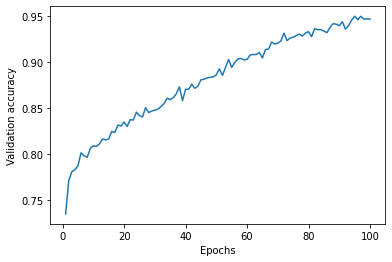

In [ ]:

import matplotlib.pyplot as plt
plt.plot(range(1, len(average_val_history) + 1), average_val_history) 
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy')
plt.show()

In [ ]:
model = build_model() 
model.fit(train_data, train_targets,
          epochs=100, batch_size=16, verbose=0)
loss, accuracy_test = model.evaluate(test_data, test_targets)
print(acccuracy_test)

RuntimeError: ignored